In [3]:
from tensorflow.keras.utils import plot_model

In [ ]:
# Pixel Model

from alquimodelia.pixel import Pixel


Pixel_model = Pixel(
            num_bands=10,
            timesteps=12,
            num_classes=3
)

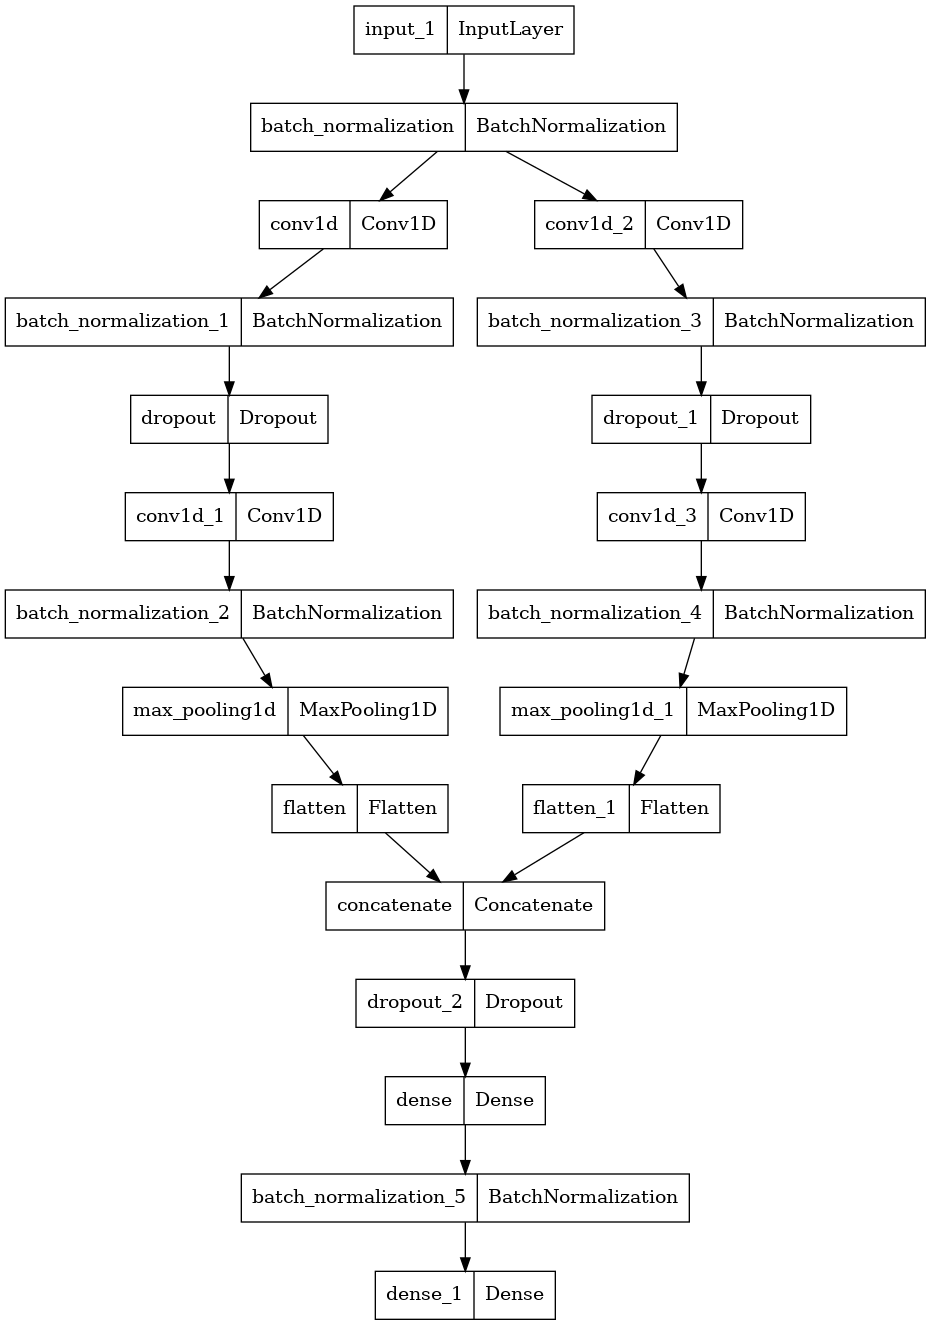

In [3]:
plot_model(Pixel_model)

In [4]:
Pixel_model.summary()

Model: "pixel"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 12, 10)]     0           []                               
                                                                                                  
 batch_normalization (BatchNorm  (None, 12, 10)      40          ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 conv1d (Conv1D)                (None, 10, 64)       1984        ['batch_normalization[0][0]']    
                                                                                                  
 conv1d_2 (Conv1D)              (None, 8, 64)        3264        ['batch_normalization[0][0]']

In [5]:
# 2D Model

from alquimodelia.unet_arch import UNet2D, UNet3D


UNet2D_model = UNet2D(
        n_filters=16,
        number_of_conv_layers=None,
        kernel_size=3,
        batchnorm=True,
        padding_style="same",
        activation="relu",
        kernel_initializer="he_normal",
        timesteps=12,
        width=600,
        height=600,
        padding=None,
        num_bands=10,
        num_classes=4,
        activation_final=None,
        data_format="channels_last",
)

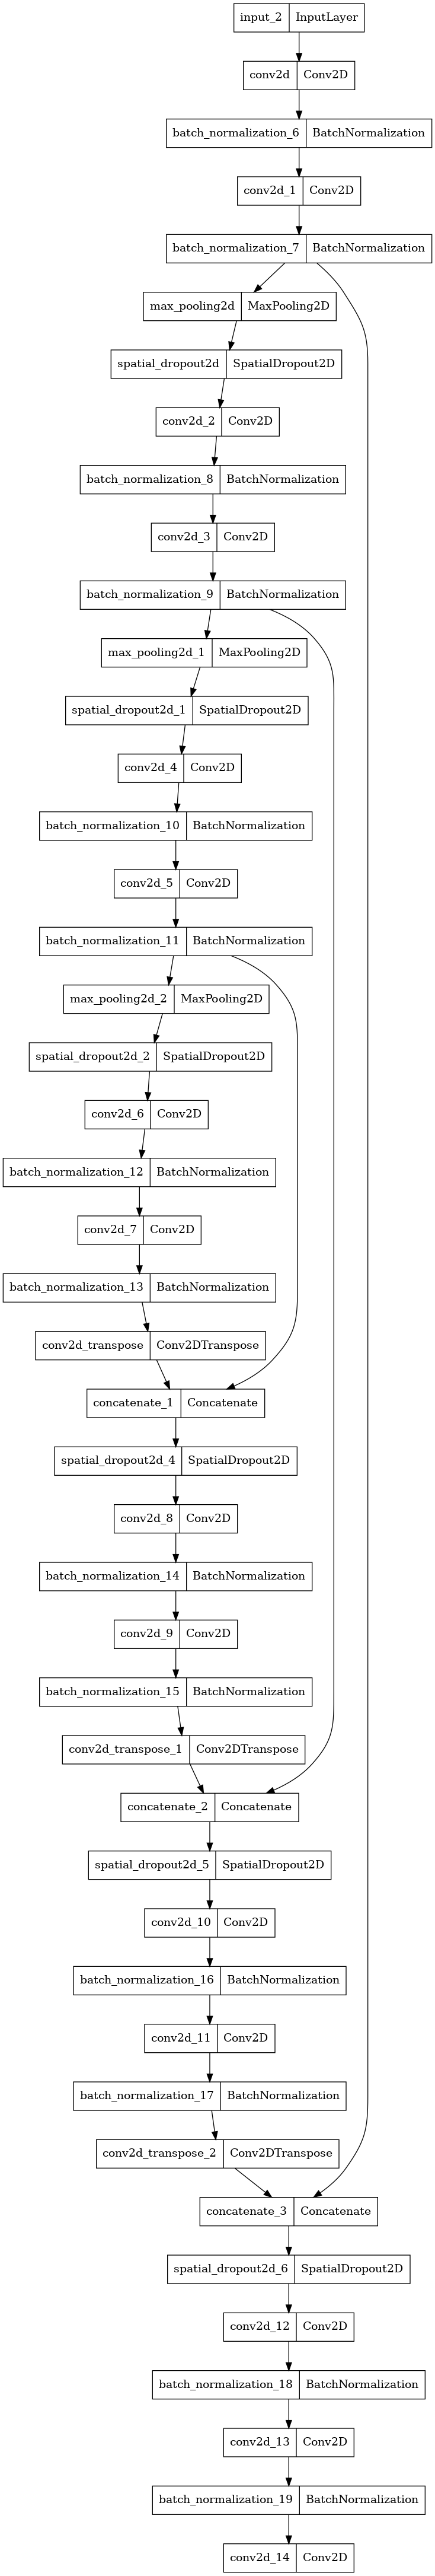

In [6]:
plot_model(UNet2D_model)

In [7]:
UNet2D_model.summary()

Model: "u_net2d"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 600, 600, 1  0           []                               
                                0)]                                                               
                                                                                                  
 conv2d (Conv2D)                (None, 600, 600, 16  1456        ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_6 (BatchNo  (None, 600, 600, 16  64         ['conv2d[0][0]']                 
 rmalization)                   )                                                           

                                                                                                  
 conv2d_9 (Conv2D)              (None, 150, 150, 64  36928       ['batch_normalization_14[0][0]'] 
                                )                                                                 
                                                                                                  
 batch_normalization_15 (BatchN  (None, 150, 150, 64  256        ['conv2d_9[0][0]']               
 ormalization)                  )                                                                 
                                                                                                  
 conv2d_transpose_1 (Conv2DTran  (None, 300, 300, 32  18464      ['batch_normalization_15[0][0]'] 
 spose)                         )                                                                 
                                                                                                  
 concatena

In [8]:
UNet3D_model = UNet3D(
        n_filters=16,
        number_of_conv_layers=None,
        kernel_size=3,
        batchnorm=True,
        padding_style="same",
        activation="relu",
        kernel_initializer="he_normal",
        timesteps=12,
        width=600,
        height=600,
        padding=None,
        num_bands=10,
        num_classes=4,
        activation_final=None,
        data_format="channels_last",
)

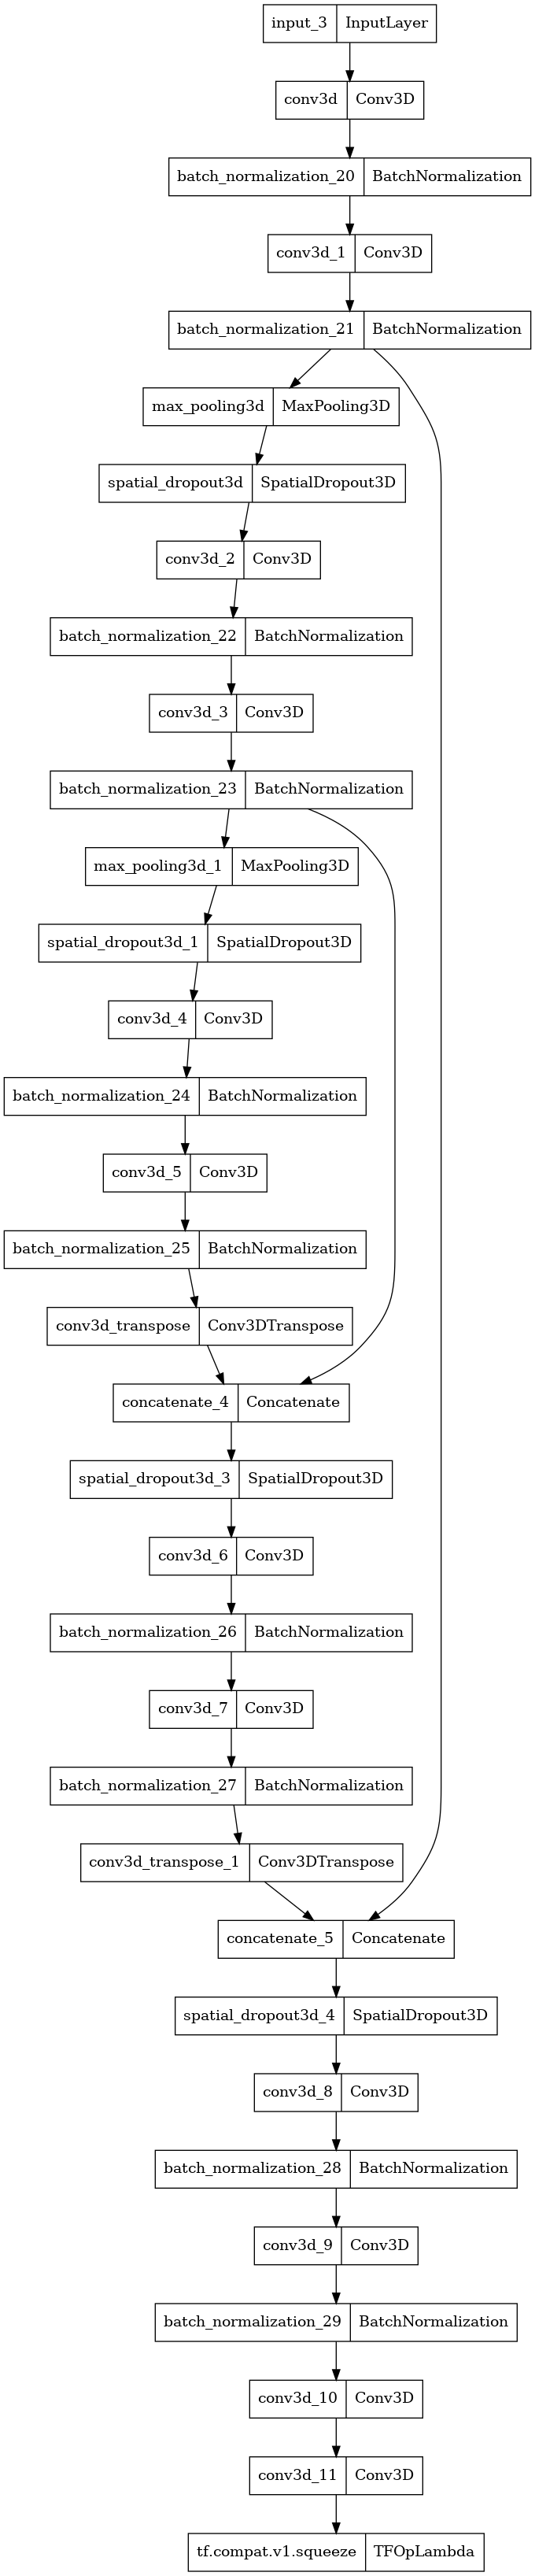

In [9]:
plot_model(UNet3D_model)

In [10]:
UNet3D_model.summary()

Model: "u_net3d"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 12, 600, 60  0           []                               
                                0, 10)]                                                           
                                                                                                  
 conv3d (Conv3D)                (None, 12, 600, 600  4336        ['input_3[0][0]']                
                                , 16)                                                             
                                                                                                  
 batch_normalization_20 (BatchN  (None, 12, 600, 600  64         ['conv3d[0][0]']                 
 ormalization)                  , 16)                                                       

                                                                                                  
 conv3d_8 (Conv3D)              (None, 12, 600, 600  13840       ['spatial_dropout3d_4[0][0]']    
                                , 16)                                                             
                                                                                                  
 batch_normalization_28 (BatchN  (None, 12, 600, 600  64         ['conv3d_8[0][0]']               
 ormalization)                  , 16)                                                             
                                                                                                  
 conv3d_9 (Conv3D)              (None, 12, 600, 600  6928        ['batch_normalization_28[0][0]'] 
                                , 16)                                                             
                                                                                                  
 batch_nor

In [11]:
# RESNET

from alquimodelia.resnet_arch import ResNet2D, ResNet3D


ResNet2D_model = ResNet2D(
        n_filters=16,
        timesteps=12,
        width=600,
        height=600,
        num_bands=10,
        num_classes=4,
        activation_final=None,
        data_format="channels_last",
)

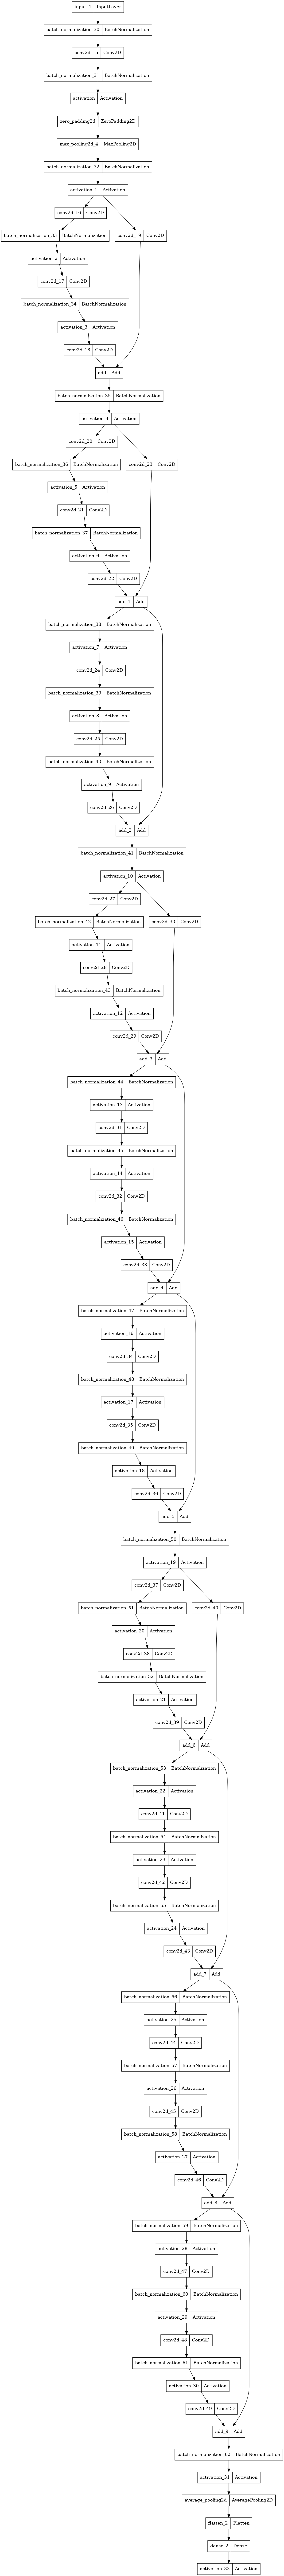

In [12]:
plot_model(ResNet2D_model)

In [13]:
ResNet2D_model.summary()

Model: "res_net2d"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 600, 600, 1  0           []                               
                                0)]                                                               
                                                                                                  
 batch_normalization_30 (BatchN  (None, 600, 600, 10  40         ['input_4[0][0]']                
 ormalization)                  )                                                                 
                                                                                                  
 conv2d_15 (Conv2D)             (None, 600, 600, 2)  500         ['batch_normalization_30[0][0]'] 
                                                                                          

                                                                                                  
 conv2d_25 (Conv2D)             (None, 150, 150, 2)  36          ['activation_8[0][0]']           
                                                                                                  
 batch_normalization_40 (BatchN  (None, 150, 150, 2)  8          ['conv2d_25[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_9 (Activation)      (None, 150, 150, 2)  0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 conv2d_26 (Conv2D)             (None, 150, 150, 8)  16          ['activation_9[0][0]']           
                                                                                                  
 add_2 (Ad

                                                                                                  
 add_5 (Add)                    (None, 75, 75, 16)   0           ['conv2d_36[0][0]',              
                                                                  'add_4[0][0]']                  
                                                                                                  
 batch_normalization_50 (BatchN  (None, 75, 75, 16)  64          ['add_5[0][0]']                  
 ormalization)                                                                                    
                                                                                                  
 activation_19 (Activation)     (None, 75, 75, 16)   0           ['batch_normalization_50[0][0]'] 
                                                                                                  
 conv2d_37 (Conv2D)             (None, 75, 75, 8)    128         ['activation_19[0][0]']          
          

 conv2d_47 (Conv2D)             (None, 38, 38, 8)    256         ['activation_28[0][0]']          
                                                                                                  
 batch_normalization_60 (BatchN  (None, 38, 38, 8)   32          ['conv2d_47[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_29 (Activation)     (None, 38, 38, 8)    0           ['batch_normalization_60[0][0]'] 
                                                                                                  
 conv2d_48 (Conv2D)             (None, 38, 38, 8)    576         ['activation_29[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 38, 38, 8)   32          ['conv2d_48[0][0]']              
 ormalizat

In [14]:
ResNet3D_model = ResNet3D(
        n_filters=16,
        timesteps=12,
        width=600,
        height=600,
        num_bands=10,
        num_classes=4,
        activation_final=None,
        data_format="channels_last",
)

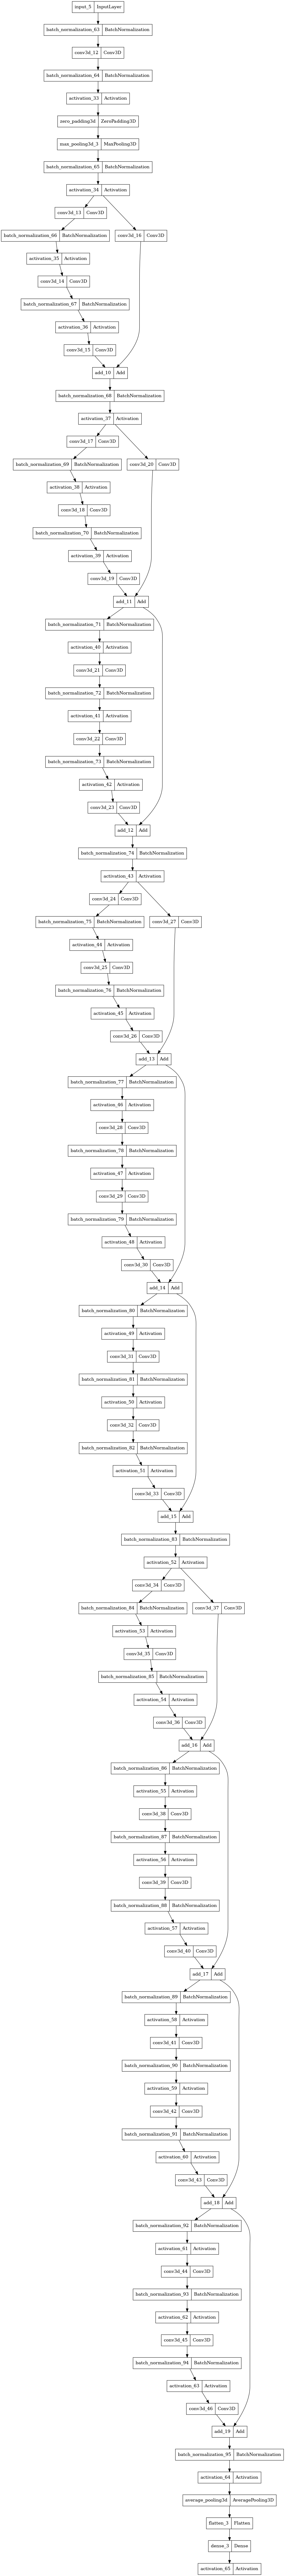

In [15]:
plot_model(ResNet3D_model)

In [16]:
ResNet3D_model.summary()

Model: "res_net3d"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 12, 600, 60  0           []                               
                                0, 10)]                                                           
                                                                                                  
 batch_normalization_63 (BatchN  (None, 12, 600, 600  40         ['input_5[0][0]']                
 ormalization)                  , 10)                                                             
                                                                                                  
 conv3d_12 (Conv3D)             (None, 12, 600, 600  2500        ['batch_normalization_63[0][0]'] 
                                , 2)                                                      

                                                                                                  
 conv3d_20 (Conv3D)             (None, 3, 150, 150,  32          ['activation_37[0][0]']          
                                 8)                                                               
                                                                                                  
 add_11 (Add)                   (None, 3, 150, 150,  0           ['conv3d_19[0][0]',              
                                 8)                               'conv3d_20[0][0]']              
                                                                                                  
 batch_normalization_71 (BatchN  (None, 3, 150, 150,  32         ['add_11[0][0]']                 
 ormalization)                   8)                                                               
                                                                                                  
 activatio

                                )                                                                 
                                                                                                  
 conv3d_29 (Conv3D)             (None, 2, 75, 75, 4  432         ['activation_47[0][0]']          
                                )                                                                 
                                                                                                  
 batch_normalization_79 (BatchN  (None, 2, 75, 75, 4  16         ['conv3d_29[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 activation_48 (Activation)     (None, 2, 75, 75, 4  0           ['batch_normalization_79[0][0]'] 
                                )                                                                 
          

 activation_55 (Activation)     (None, 1, 38, 38, 3  0           ['batch_normalization_86[0][0]'] 
                                2)                                                                
                                                                                                  
 conv3d_38 (Conv3D)             (None, 1, 38, 38, 8  256         ['activation_55[0][0]']          
                                )                                                                 
                                                                                                  
 batch_normalization_87 (BatchN  (None, 1, 38, 38, 8  32         ['conv3d_38[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 activation_56 (Activation)     (None, 1, 38, 38, 8  0           ['batch_normalization_87[0][0]'] 
          

                                                                                                  
 add_19 (Add)                   (None, 1, 38, 38, 3  0           ['conv3d_46[0][0]',              
                                2)                                'add_18[0][0]']                 
                                                                                                  
 batch_normalization_95 (BatchN  (None, 1, 38, 38, 3  128        ['add_19[0][0]']                 
 ormalization)                  2)                                                                
                                                                                                  
 activation_64 (Activation)     (None, 1, 38, 38, 3  0           ['batch_normalization_95[0][0]'] 
                                2)                                                                
                                                                                                  
 average_p

In [ ]:
RnnLSTM_model = RnnLSTM(
        timesteps=12,
        num_bands=10,
        num_classes=4,
        activation_final="softmax",
        data_format="channels_last",
)

In [4]:
RnnLSTM_model.summary()

Model: "rnn_lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 10)]          0         
                                                                 
 batch_normalization (BatchN  (None, 12, 10)           40        
 ormalization)                                                   
                                                                 
 lstm (LSTM)                 (None, 12, 120)           62880     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 6, 120)           0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 6, 120)           480       
 hNormalization)                                                 
                                                          

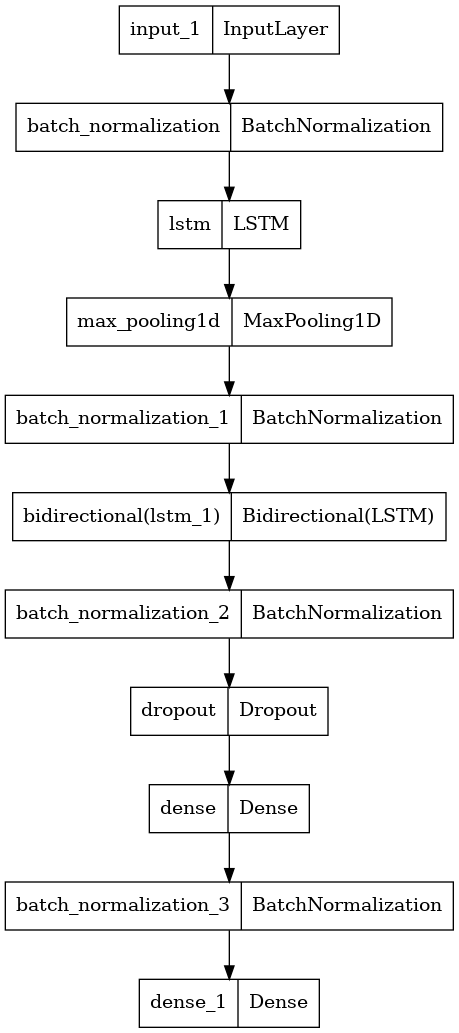

In [5]:
plot_model(RnnLSTM_model)